In [8]:
import sys
import pandas as pd
from textblob import TextBlob
import re
import gensim
from gensim import corpora
from pprint import pprint
import numpy as np
import scipy
from wordcloud import STOPWORDS


In [9]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could', '_', 
                   'be', 'know', 'good', 'go', 'get', 'do', 'done', 'try', 'many', 'some', 'nice',
                   'thank', 'think', 'see', 'rather', 'easy', 'easily', 'lot', 'lack', 'make',
                   'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come'])

df=pd.read_csv(r'E:\learn\british_text_review1.csv')
df = df.loc[df.Location.isin(['United Kingdom', 'Canada', 'United States', 'Austria',
       'South Africa', 'Italy', 'Denmark', 'Singapore', 'Netherlands',
       'Belgium', 'Australia', 'Nigeria', 'Japan', 'Ukraine', 'Germany',
       'Ireland', 'Spain', 'China', 'Ecuador', 'Switzerland', 'Romania',
       'France', 'Kuwait', 'Iceland', 'Poland', 'Qatar', 'Greece',
       'Senegal', 'United Arab Emirates', 'Cyprus', 'Chile', 'Sweden',
       'Hong Kong', 'India', 'New Zealand', 'Czech Republic', 'Malaysia',
       'Ghana', 'Bermuda', 'Botswana', 'Brazil', 'Panama',
       'Russian Federation', 'Philippines', 'Bulgaria', 'Thailand',
       'Argentina', 'Mexico', 'Saint Kitts and Nevis', 'Vietnam',
       'Norway', 'Jordan', 'Taiwan', 'Slovakia', 'Israel', 'South Korea',
       'Saudi Arabia', 'Hungary', 'Portugal', 'Cayman Islands',
       'Costa Rica', 'Egypt', 'Laos', 'Turkey', 'Indonesia', 'Bahrain',
       'Dominican Republic', 'Luxembourg', 'Finland',
       'Trinidad & Tobago']) , :]

stopword=set(STOPWORDS)

In [10]:
df

,Location,Date,Review,Recommend,Star_Rating
0,United Kingdom,26th June 2024,✅ Trip Verified | This is a route I fly regula...,Yes,5
1,Canada,23rd June 2024,✅ Trip Verified | While BA may have made some...,No,6
2,Canada,23rd June 2024,✅ Trip Verified | British Airways new Club Sui...,No,3
3,United Kingdom,18th June 2024,"✅ Trip Verified | Four very pleasant, on time...",Yes,5
4,United Kingdom,18th June 2024,Not Verified | We travel extensively over 25...,No,9
...,...,...,...,...,...
3461,United Kingdom,12th October 2014,Route: Heathrow - Toronto First Class daytime ...,Yes,5
3462,United Kingdom,8th October 2014,LGW to SZG. Absolutely useless for a scheduled...,No,8
3463,United Kingdom,8th October 2014,BA92 4/10/14 YYZ-LHR B787 G-ZBJE. If you want ...,No,6
3464,United Kingdom,8th October 2014,Very comfortable return flight to Hannover in ...,Yes,3


# Remove newline char

In [11]:
def sent_to_words(sentences):
    for sent in sentences:
        sent = re.sub('\s+', ' ', sent)  # remove newline chars
        sent = re.sub("\'", "", sent)  # remove single quotes
        sent = gensim.utils.simple_preprocess(str(sent), deacc=True) 
        yield(sent)  

In [12]:
data = df.Review.values.tolist()
data_words = list(sent_to_words(data))
print(data_words[:1])

[['trip', 'verified', 'this', 'is', 'route', 'fly', 'regularly', 'used', 'first', 'class', 'security', 'and', 'lounge', 'all', 'good', 'lounge', 'surprisingly', 'not', 'so', 'busy', 'was', 'great', 'to', 'see', 'we', 'werent', 'departing', 'from', 'the', 'dreaded', 'bus', 'gate', 'and', 'the', 'flight', 'was', 'on', 'time', 'boarded', 'and', 'ready', 'to', 'go', 'on', 'time', 'and', 'then', 'six', 'passengers', 'were', 'no', 'show', 'minute', 'delay', 'to', 'offload', 'the', 'bags', 'and', 'depart', 'longer', 'than', 'the', 'actual', 'flight', 'itself', 'there', 'has', 'to', 'be', 'better', 'process', 'for', 'fast', 'tracking', 'this', 'hence', 'finally', 'arrived', 'in', 'paris', 'mins', 'late', 'on', 'the', 'plus', 'side', 'the', 'cabin', 'crew', 'were', 'great', 'and', 'even', 'had', 'personal', 'welcome', 'from', 'the', 'inflight', 'manager', 'which', 'happens', 'less', 'and', 'less', 'these', 'days']]


# Creating bigram trigram

In [13]:
bigram=gensim.models.Phrases(data_words, min_count=5, threshold=100)
trigram=gensim.models.Phrases(bigram[data_words], threshold=100)

bigram_mod=gensim.models.phrases.Phraser(bigram)
trigram_mod=gensim.models.phrases.Phraser(trigram)


In [14]:
import spacy
from gensim.utils import simple_preprocess

In [16]:
import spacy
from gensim.utils import simple_preprocess
from gensim.models.phrases import Phrases, Phraser

def process_words(texts, stop_words, allowed_postags=['NOUN', 'VERB', 'ADVERB', 'ADJECTIVE']):
    # Tokenize and remove stop words
    texts = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
    
    # Assume bigram_mod and trigram_mod are already created and passed to the function
    texts = [bigram_mod[doc] for doc in texts]
    texts = [trigram_mod[bigram_mod[doc]] for doc in texts]
    
    # Initialize spaCy
    nlp = spacy.load("en_core_web_sm")
    
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent))
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    
    # Remove stop words again after lemmatization
    texts_out = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts_out]
    
    return texts_out

# Example usage
# Assuming data_words, stop_words, bigram_mod, and trigram_mod are already defined
data_ready = process_words(data_words, stop_words)



# lda(Latent dirichlet allocation)

In [22]:
id2word=corpora.Dictionary(data_ready)

corpus=[id2word.doc2bow(text) for text in data_ready]

lda_model=gensim.models.ldamodel.LdaModel(corpus=corpus,
                                        id2word=id2word,
                                        num_topics=4, 
                                       random_state=100,
                                       update_every=1,
                                       chunksize=10,
                                       passes=10,
                                       alpha='symmetric',
                                       iterations=100,
                                       per_word_topics=True)
print(lda_model.print_topics())

[(0, '0.047*"travel" + 0.027*"customer" + 0.022*"book" + 0.015*"way" + 0.014*"service" + 0.014*"notice" + 0.013*"year" + 0.013*"pay" + 0.012*"put" + 0.011*"month"'), (1, '0.079*"flight" + 0.026*"hour" + 0.021*"staff" + 0.019*"check" + 0.018*"fly" + 0.017*"time" + 0.016*"day" + 0.016*"delay" + 0.015*"airline" + 0.012*"passenger"'), (2, '0.128*"seat" + 0.041*"class" + 0.034*"economy" + 0.034*"business" + 0.028*"fly" + 0.025*"food" + 0.013*"airline" + 0.012*"product" + 0.010*"leg" + 0.010*"window"'), (3, '0.064*"flight" + 0.037*"crew" + 0.029*"cabin" + 0.029*"service" + 0.026*"time" + 0.024*"food" + 0.021*"drink" + 0.018*"lounge" + 0.017*"return" + 0.016*"serve"')]


# Percentage documentation


In [33]:
import pandas as pd

def format_topics_sentences(ldamodel=None, corpus=None, texts=None):
    # Init output
    sent_topics_df = []

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df.append([int(topic_num), round(prop_topic, 4), topic_keywords])
            else:
                break

    # Convert list to DataFrame
    sent_topics_df = pd.DataFrame(sent_topics_df, columns=['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords'])

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords', 'Text']

    return sent_topics_df

# Example usage
# Assuming lda_model, corpus, and data_ready are already defined
df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data_ready)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
print(df_dominant_topic.head(10))


   Document_No  Dominant_Topic  Topic_Perc_Contrib  \
0            0               3              0.6905   
1            1               3              0.7479   
2            2               3              0.3682   
3            3               2              0.3659   
4            4               1              0.5596   
5            5               2              0.4123   
6            6               1              0.3658   
7            7               1              0.9480   
8            8               3              0.7451   
9            9               3              0.8711   

                                            Keywords  \
0  flight, crew, cabin, service, time, food, drin...   
1  flight, crew, cabin, service, time, food, drin...   
2  flight, crew, cabin, service, time, food, drin...   
3  seat, class, economy, business, fly, food, air...   
4  flight, hour, staff, check, fly, time, day, de...   
5  seat, class, economy, business, fly, food, air...   
6  flight, ho

In [34]:
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,3,0.6905,"flight, crew, cabin, service, time, food, drin...","[trip, verify, route, fly, class, security, lo..."
1,1,3,0.7479,"flight, crew, cabin, service, time, food, drin...","[trip, verify, improvement, club_world, produc..."
2,2,3,0.3682,"flight, crew, cabin, service, time, food, drin...","[trip, verify, mark, improvement, club_world, ..."
3,3,2,0.3659,"seat, class, economy, business, fly, food, air...","[trip, verify, time, flight, staff, guy, forge..."
4,4,1,0.5596,"flight, hour, staff, check, fly, time, day, de...","[verify, travel, year, tend, ba, trip, year, s..."
5,5,2,0.4123,"seat, class, economy, business, fly, food, air...","[trip, verify, flight, delay, hour, weather, f..."
6,6,1,0.3658,"flight, hour, staff, check, fly, time, day, de...","[trip, verify, flight, premium, economy, feel,..."
7,7,1,0.9480,"flight, hour, staff, check, fly, time, day, de...","[trip, verify, airline, fly, check, flight, ho..."
8,8,3,0.7451,"flight, crew, cabin, service, time, food, drin...","[trip, verify, give, review, flight, business,..."
9,9,3,0.8711,"flight, crew, cabin, service, time, food, drin...","[trip, verify, fly, check, class, check, area,..."


# Frequency distribution of word count

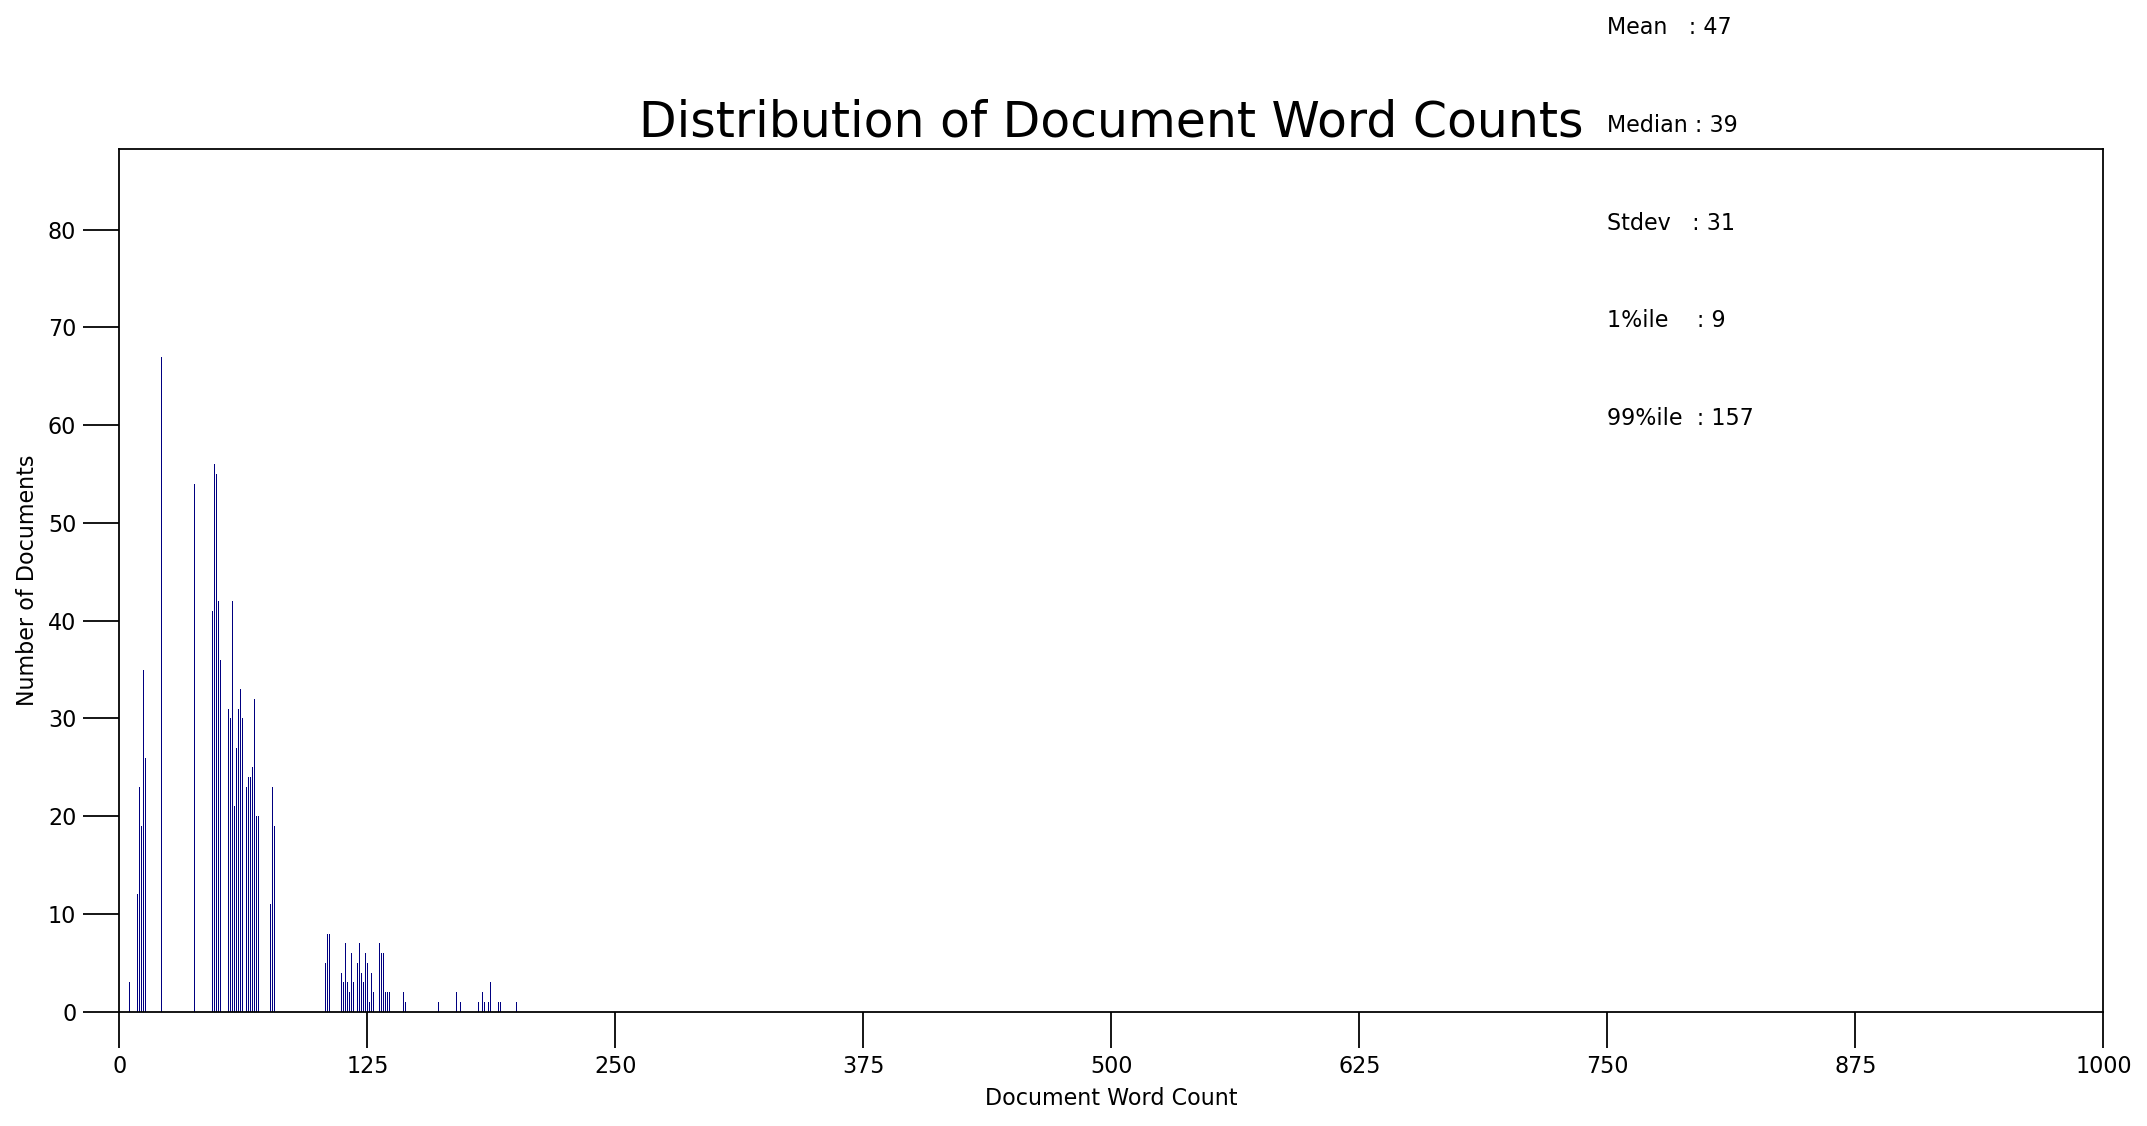

In [36]:
doc_lens = [len(d) for d in df_dominant_topic.Text]

# Plot
plt.figure(figsize=(16,7), dpi=160)
plt.hist(doc_lens, bins = 1000, color='navy')
plt.text(750, 100, "Mean   : " + str(round(np.mean(doc_lens))))
plt.text(750,  90, "Median : " + str(round(np.median(doc_lens))))
plt.text(750,  80, "Stdev   : " + str(round(np.std(doc_lens))))
plt.text(750,  70, "1%ile    : " + str(round(np.quantile(doc_lens, q=0.01))))
plt.text(750,  60, "99%ile  : " + str(round(np.quantile(doc_lens, q=0.99))))

plt.gca().set(xlim=(0, 1000), ylabel='Number of Documents', xlabel='Document Word Count')
plt.tick_params(size=16)
plt.xticks(np.linspace(0,1000,9))
plt.title('Distribution of Document Word Counts', fontdict=dict(size=22))
plt.show()

C:\Users\MSI\AppData\Local\Temp\ipykernel_7276\2460086901.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(doc_lens, color="black", shade=False, ax=ax.twinx())
C:\Users\MSI\AppData\Local\Temp\ipykernel_7276\2460086901.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(doc_lens, color="black", shade=False, ax=ax.twinx())
C:\Users\MSI\AppData\Local\Temp\ipykernel_7276\2460086901.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(doc_lens, color="black", shade=False, ax=ax.twinx())
C:\Users\MSI\AppData\Local\Temp\ipykernel_7276\2460086901.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setti

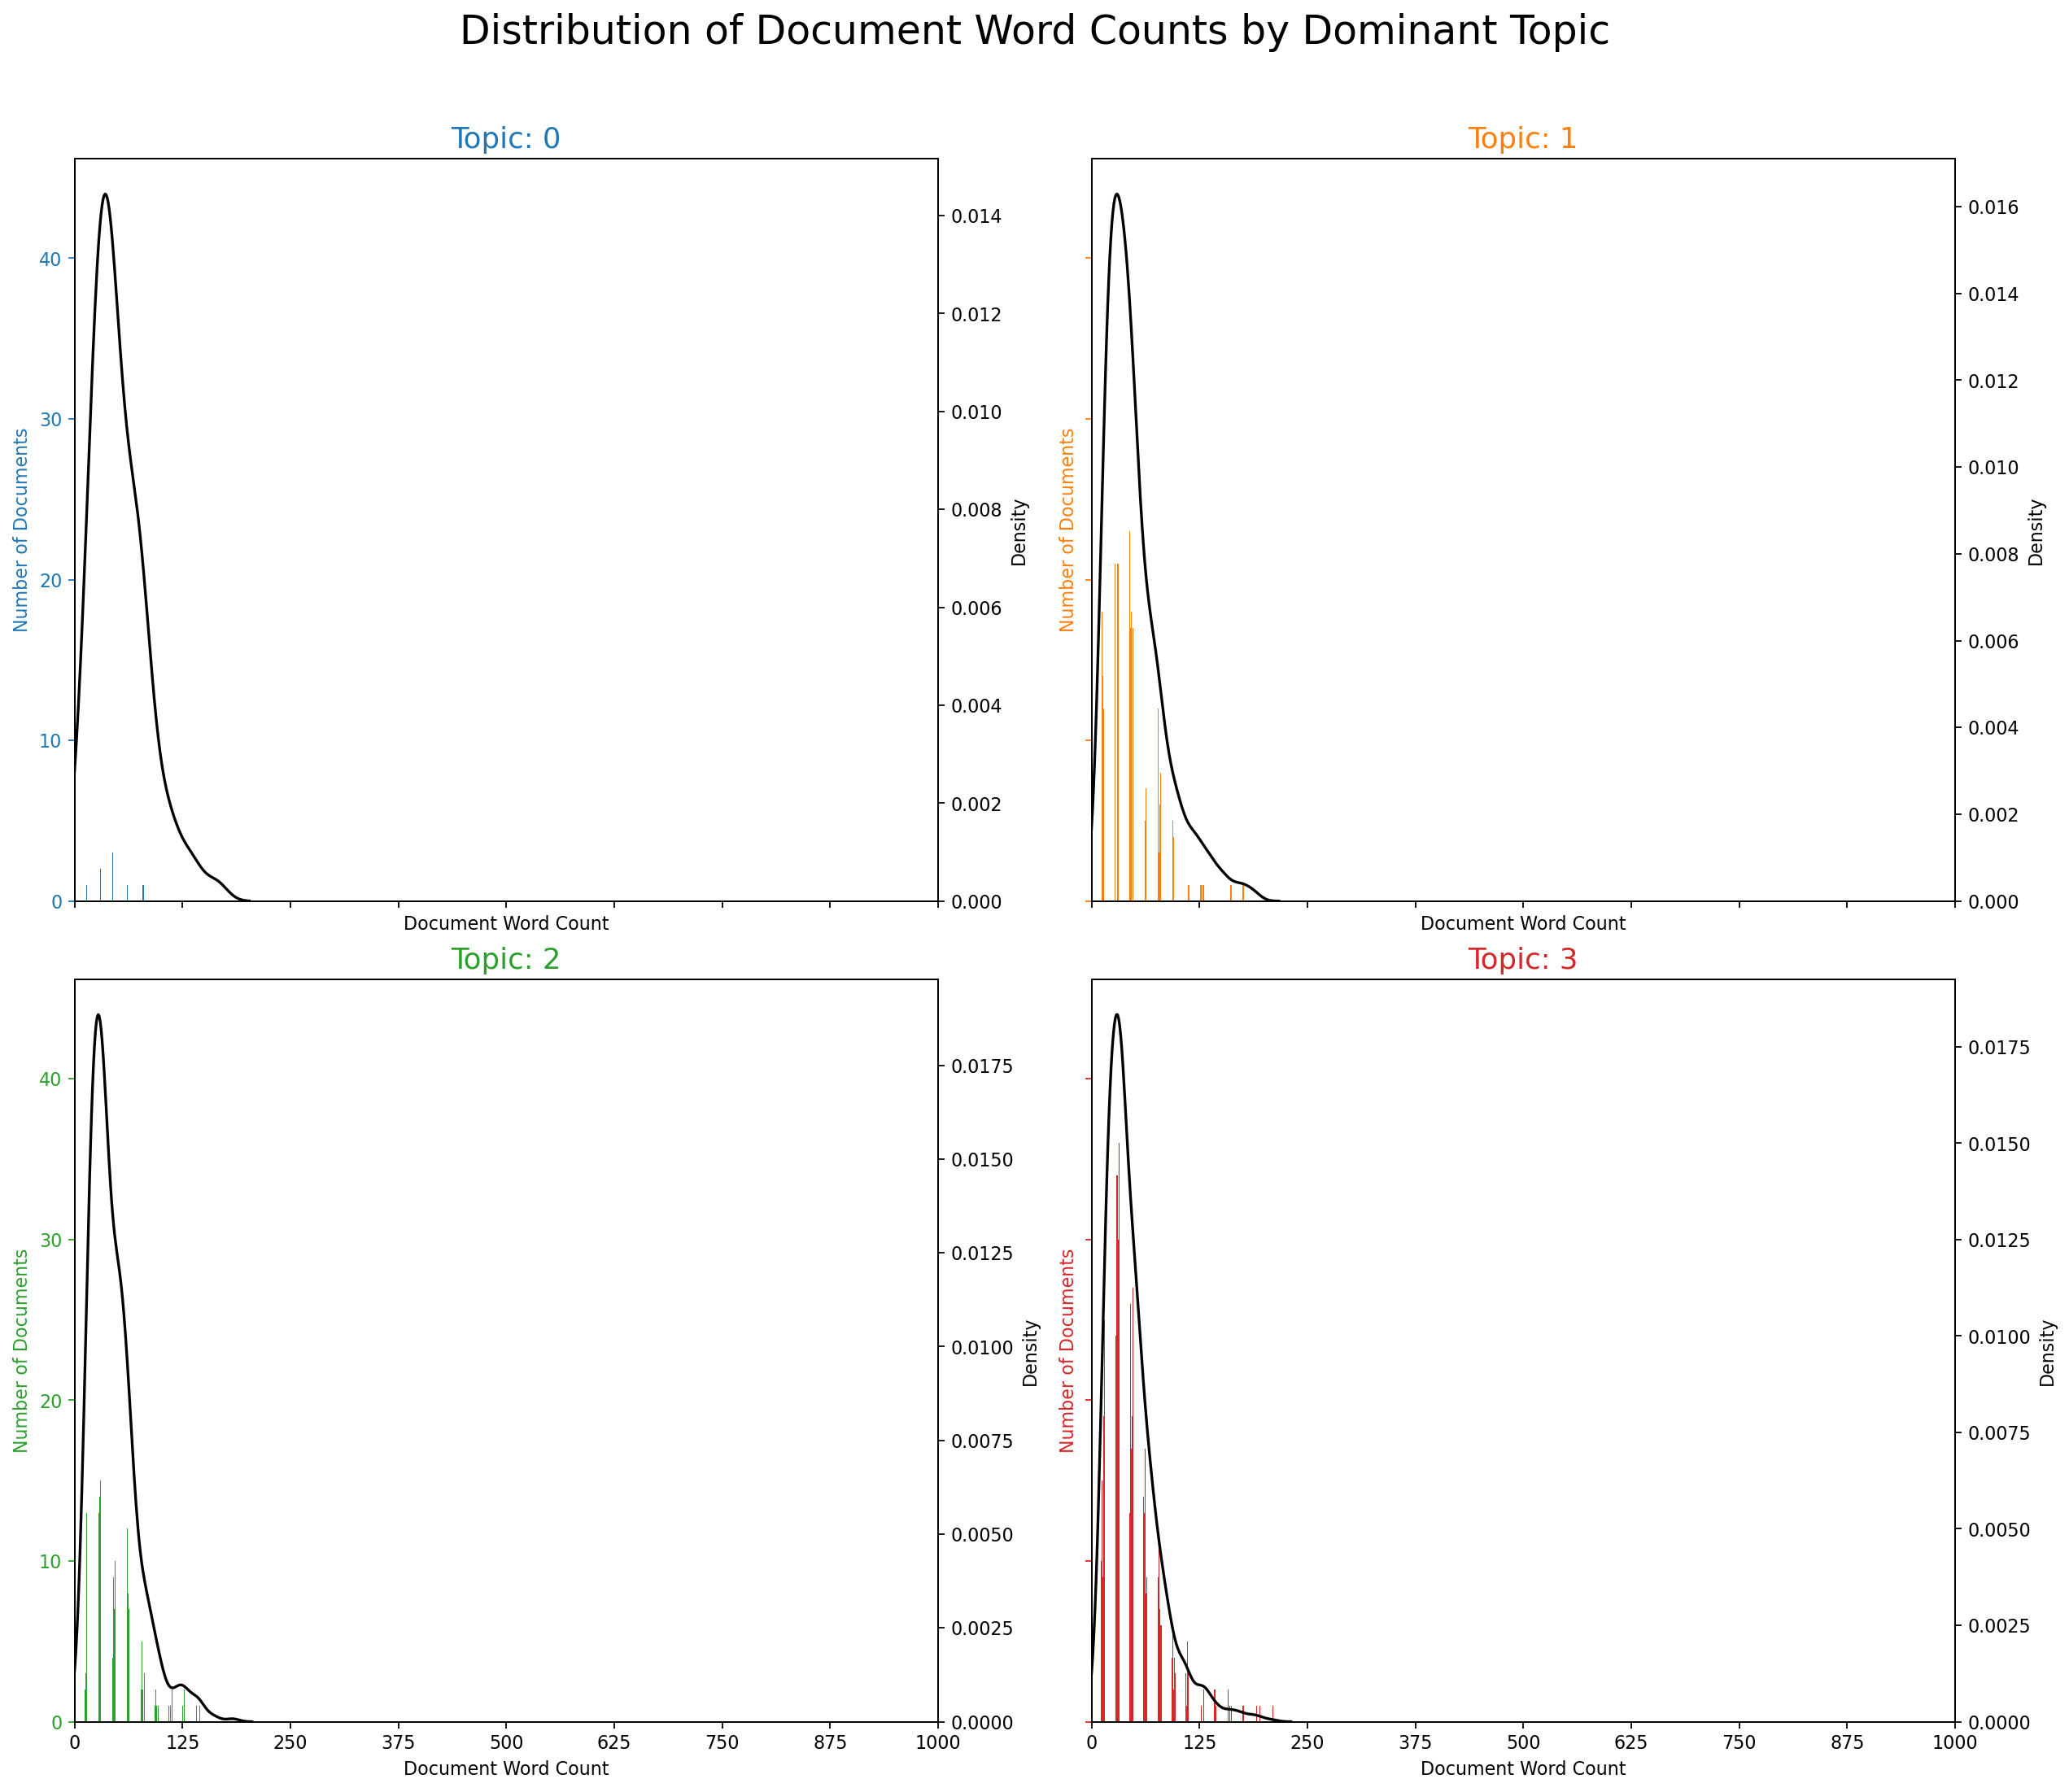

In [37]:
import seaborn as sns
import matplotlib.colors as mcolors
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

fig, axes = plt.subplots(2,2,figsize=(16,14), dpi=160, sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):    
    df_dominant_topic_sub = df_dominant_topic.loc[df_dominant_topic.Dominant_Topic == i, :]
    doc_lens = [len(d) for d in df_dominant_topic_sub.Text]
    ax.hist(doc_lens, bins = 1000, color=cols[i])
    ax.tick_params(axis='y', labelcolor=cols[i], color=cols[i])
    sns.kdeplot(doc_lens, color="black", shade=False, ax=ax.twinx())
    ax.set(xlim=(0, 1000), xlabel='Document Word Count')
    ax.set_ylabel('Number of Documents', color=cols[i])
    ax.set_title('Topic: '+str(i), fontdict=dict(size=16, color=cols[i]))

fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.xticks(np.linspace(0,1000,9))
fig.suptitle('Distribution of Document Word Counts by Dominant Topic', fontsize=22)
plt.show()